# Example of application to real data

add script to scrap data with yahoo finance

In [70]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [71]:
dataset = ["vetropak","vontonbel","sig","vaudoise","bcv"]
name = "vetropak"
path = "./data/data_bcv.xlsx"
folder_results = './results/'+name
if os.path.exists(folder_results) == False:
    os.makedirs(folder_results)

trade = pd.read_excel(path,sheet_name="trade_price")
print(trade.shape)
trade.head(5)

(3137, 3)


,Trade Close,Trade Count,Timestamp
0,70.8,96,2021-12-30 19:00:00
1,70.8,88,2021-12-30 18:30:00
2,70.7,1,2021-12-30 18:00:00
3,70.8,9,2021-12-30 17:30:00
4,70.7,18,2021-12-30 17:00:00


In [72]:
bid = pd.read_excel(path,sheet_name="bid")
print(bid.shape)
bid.head(5)

(3033, 2)


,Bid Close,Timestamp
0,70.1,2021-12-30 19:00:00
1,70.8,2021-12-30 18:30:00
2,70.7,2021-12-30 18:00:00
3,70.7,2021-12-30 17:30:00
4,70.7,2021-12-30 17:00:00


In [73]:
ask = pd.read_excel(path,sheet_name="ask")
print(ask.shape)
ask.head(5)

(3102, 2)


,Ask Close,Timestamp
0,71.2,2021-12-30 19:00:00
1,70.9,2021-12-30 18:30:00
2,70.8,2021-12-30 18:00:00
3,70.9,2021-12-30 17:30:00
4,70.9,2021-12-30 17:00:00


In [74]:
bid_ask_merge = pd.merge(bid,ask,on=["Timestamp"])
print(bid_ask_merge.shape)

(2924, 3)


In [75]:
bid_ask_merge

,Bid Close,Timestamp,Ask Close
0,70.10,2021-12-30 19:00:00,71.2
1,70.80,2021-12-30 18:30:00,70.9
2,70.70,2021-12-30 18:00:00,70.8
3,70.70,2021-12-30 17:30:00,70.9
4,70.70,2021-12-30 17:00:00,70.9
...,...,...,...
2919,48.55,2021-06-08 15:30:00,82.7
2920,25.20,2021-06-08 15:30:00,82.7
2921,82.70,2021-06-08 15:00:00,82.8
2922,48.55,2021-06-08 15:00:00,82.8


In [76]:
bid_ask_merge["midpoint"]= (bid_ask_merge["Bid Close"]+bid_ask_merge["Ask Close"])/2
bid_ask_merge

,Bid Close,Timestamp,Ask Close,midpoint
0,70.10,2021-12-30 19:00:00,71.2,70.650
1,70.80,2021-12-30 18:30:00,70.9,70.850
2,70.70,2021-12-30 18:00:00,70.8,70.750
3,70.70,2021-12-30 17:30:00,70.9,70.800
4,70.70,2021-12-30 17:00:00,70.9,70.800
...,...,...,...,...
2919,48.55,2021-06-08 15:30:00,82.7,65.625
2920,25.20,2021-06-08 15:30:00,82.7,53.950
2921,82.70,2021-06-08 15:00:00,82.8,82.750
2922,48.55,2021-06-08 15:00:00,82.8,65.675


In [77]:
final_merged = pd.merge(bid_ask_merge,trade,on=["Timestamp"])
final_merged["bid-ask spread"] = final_merged["Ask Close"] - final_merged["Bid Close"]
final_merged

,Bid Close,Timestamp,Ask Close,midpoint,Trade Close,Trade Count,bid-ask spread
0,70.10,2021-12-30 19:00:00,71.2,70.650,70.8,96,1.10
1,70.80,2021-12-30 18:30:00,70.9,70.850,70.8,88,0.10
2,70.70,2021-12-30 18:00:00,70.8,70.750,70.7,1,0.10
3,70.70,2021-12-30 17:30:00,70.9,70.800,70.8,9,0.20
4,70.70,2021-12-30 17:00:00,70.9,70.800,70.7,18,0.20
...,...,...,...,...,...,...,...
2740,48.55,2021-06-08 15:30:00,82.7,65.625,82.7,73,34.15
2741,25.20,2021-06-08 15:30:00,82.7,53.950,82.7,73,57.50
2742,82.70,2021-06-08 15:00:00,82.8,82.750,82.8,69,0.10
2743,48.55,2021-06-08 15:00:00,82.8,65.675,82.8,69,34.25


In [78]:
final_merged['direction_trade'] = np.where(final_merged['Trade Close']>= final_merged['midpoint'], "buy", "sell")
final_merged.head()

,Bid Close,Timestamp,Ask Close,midpoint,Trade Close,Trade Count,bid-ask spread,direction_trade
0,70.1,2021-12-30 19:00:00,71.2,70.65,70.8,96,1.1,buy
1,70.8,2021-12-30 18:30:00,70.9,70.85,70.8,88,0.1,sell
2,70.7,2021-12-30 18:00:00,70.8,70.75,70.7,1,0.1,sell
3,70.7,2021-12-30 17:30:00,70.9,70.80,70.8,9,0.2,sell
4,70.7,2021-12-30 17:00:00,70.9,70.80,70.7,18,0.2,sell


In [79]:
data_final = final_merged[["Timestamp","Trade Close","Trade Count","direction_trade","midpoint"]]

data_final

,Timestamp,Trade Close,Trade Count,direction_trade,midpoint
0,2021-12-30 19:00:00,70.8,96,buy,70.650
1,2021-12-30 18:30:00,70.8,88,sell,70.850
2,2021-12-30 18:00:00,70.7,1,sell,70.750
3,2021-12-30 17:30:00,70.8,9,sell,70.800
4,2021-12-30 17:00:00,70.7,18,sell,70.800
...,...,...,...,...,...
2740,2021-06-08 15:30:00,82.7,73,buy,65.625
2741,2021-06-08 15:30:00,82.7,73,buy,53.950
2742,2021-06-08 15:00:00,82.8,69,buy,82.750
2743,2021-06-08 15:00:00,82.8,69,buy,65.675


In [80]:
test = data_final.copy()
test.head(5)

,Timestamp,Trade Close,Trade Count,direction_trade,midpoint
0,2021-12-30 19:00:00,70.8,96,buy,70.65
1,2021-12-30 18:30:00,70.8,88,sell,70.85
2,2021-12-30 18:00:00,70.7,1,sell,70.75
3,2021-12-30 17:30:00,70.8,9,sell,70.80
4,2021-12-30 17:00:00,70.7,18,sell,70.80


In [81]:
test = data_final.copy()
test["Timestamp"] = pd.to_datetime(test["Timestamp"]) # only if it isn't already
test = test.set_index("Timestamp")
agre_data = test.groupby("direction_trade").resample('D').sum()
agre_data

Trade Close  Trade Count  midpoint
direction_trade Timestamp                                     
buy             2021-06-08       1159.0         1507   906.215
                2021-06-09       1975.0         1043  1498.810
                2021-06-10       1897.4          563  1557.640
                2021-06-11        992.9          505   990.100
                2021-06-12          0.0            0     0.000
...                                 ...          ...       ...
sell            2021-12-26          0.0            0     0.000
                2021-12-27        210.6           32   210.750
                2021-12-28        422.6          170   423.000
                2021-12-29        631.7          229   632.250
                2021-12-30        635.2          224   635.750

[412 rows x 3 columns]

In [82]:
buy = agre_data["Trade Count"].loc["buy"].T
sell = agre_data["Trade Count"].loc["sell"].T

In [83]:

columns = ["#buys","#sells"]
buy_and_sell = pd.merge(buy,sell,on=["Timestamp"])
buy_and_sell.columns = columns
buy_and_sell = buy_and_sell.loc[(buy_and_sell!=0).any(axis=1)]
print(buy_and_sell.shape)
buy_and_sell

(147, 2)


,#buys,#sells
Timestamp,,
2021-06-08,1507,472
2021-06-09,1043,682
2021-06-10,563,595
2021-06-11,505,459
2021-06-14,256,573
...,...,...
2021-12-23,415,166
2021-12-27,444,32
2021-12-28,230,170


<AxesSubplot:xlabel='Timestamp'>

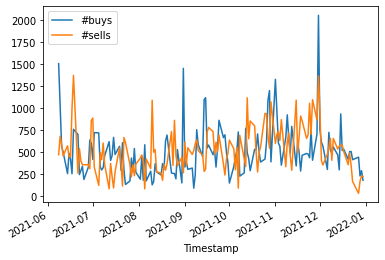

In [84]:
buy_and_sell.plot()

In [85]:
buy_and_sell.describe()

,#buys,#sells
count,147.000000,147.000000
mean,508.918367,525.088435
std,286.921819,256.243247
min,91.000000,32.000000
25%,304.500000,355.500000
50%,472.000000,491.000000
75%,614.500000,658.000000
max,2057.000000,1374.000000


par.model.save_dir


100%|██████████| 147/147 [14:31<00:00,  5.93s/it]


<AxesSubplot:xlabel='Timestamp'>

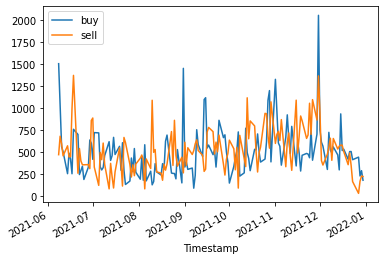

In [86]:
from model.deepsurrogate import DeepSurrogate
from tqdm import tqdm
deepsurrogate = DeepSurrogate()

columns_pin = ["buy","sell"]
buy_and_sell.columns = columns_pin
#buy_and_sell = buy_and_sell.head(50)

PIN_values = []
for i in tqdm(range(buy_and_sell.shape[0])):
    pin = deepsurrogate.get_pin(buy_and_sell.iloc[i].values)
    #print(pin)
    PIN_values.append(pin)

buy_and_sell['PIN'] = PIN_values
buy_and_sell.to_csv("test_results.csv")
buy_and_sell[["buy","sell"]].plot()

In [87]:
close_price = final_merged[['Timestamp','midpoint','bid-ask spread']]
close_price.index = close_price['Timestamp']
close_price = close_price.iloc[:,1:]
close_price = close_price.resample('D').mean()
close_price = close_price.dropna()
graph_merge = pd.merge(close_price,buy_and_sell,left_index=True,right_index=True)
graph_merge["buy-sell difference"] = np.abs(graph_merge['buy'] - graph_merge["sell"])

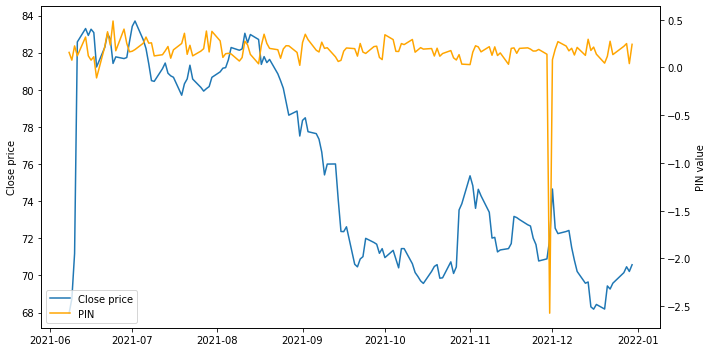

<Figure size 432x288 with 0 Axes>

In [88]:
fig,ax = plt.subplots(figsize=(10,5))
l1, = ax.plot(graph_merge.index,graph_merge.midpoint)
ax.set_ylabel(r"Close price")
ax2 = ax.twinx()
l2, = ax2.plot(graph_merge.index, graph_merge.PIN,color="orange")
ax2.set_ylabel(r"PIN value")

plt.legend([l1, l2],["Close price", "PIN"])
plt.xlabel(r"Date")
plt.tight_layout()
plt.grid(False)
plt.show()
plt.savefig(folder_results+"/close_price_pin.png")

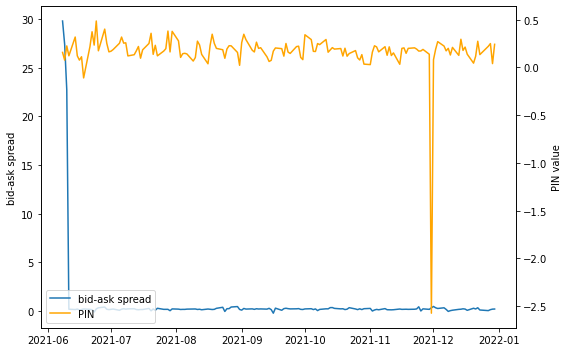

In [89]:
fig,ax = plt.subplots(figsize=(8,5))
l1, = ax.plot(graph_merge.index,graph_merge["bid-ask spread"])
ax.set_ylabel(r"bid-ask spread")
ax2 = ax.twinx()
l2, = ax2.plot(graph_merge.index, graph_merge.PIN,color="orange")
ax2.set_ylabel(r"PIN value")

plt.legend([l1, l2],["bid-ask spread", "PIN"])
plt.xlabel(r"Date")
plt.grid(False)
plt.tight_layout()
plt.savefig(folder_results+"/bid_ask_spread_pin.png")
plt.show()


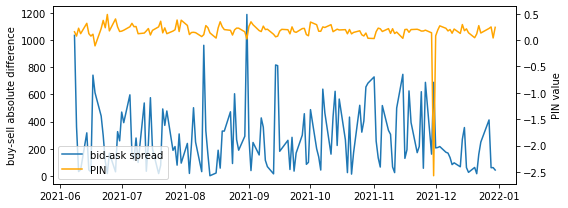

In [90]:
fig,ax = plt.subplots(figsize=(8,3))
l1, = ax.plot(graph_merge.index,graph_merge["buy-sell difference"])
ax.set_ylabel(r"buy-sell absolute difference")
ax2 = ax.twinx()
l2, = ax2.plot(graph_merge.index, graph_merge.PIN,color="orange")
ax2.set_ylabel(r"PIN value")

plt.legend([l1, l2],["bid-ask spread", "PIN"])
plt.xlabel(r"Date")
plt.tight_layout()
plt.grid(False)
plt.show()
#plt.savefig(folder_results+"/bid_ask_spread_pin.png")

In [101]:
from pin_model_simulation import fit

# create another strcture
for i in tqdm(range(buy_and_sell.shape[0])):
    value = buy_and_sell.iloc[i]
    #print(value["buy"][:])
    res = fit(pd.Series(value["buy"]), pd.Series(value["sell"]),1)
    PIN = (res['a']*res['mu'])/((res['a']*res['mu'])+res['eb']+res['es'])
    print(PIN)

  1%|          | 1/147 [00:08<21:02,  8.65s/it]

5.2298867461708835e-06


  1%|▏         | 2/147 [00:15<18:45,  7.76s/it]

2.092749243579844e-06


  2%|▏         | 3/147 [00:26<21:29,  8.96s/it]

2.7620699815356567e-07


  3%|▎         | 4/147 [01:21<1:04:39, 27.13s/it]

4.770814930053464e-07


  3%|▎         | 5/147 [01:59<1:13:55, 31.24s/it]

3.823869366037364e-06


  4%|▍         | 6/147 [02:05<53:08, 22.61s/it]  

4.5977769067195006e-07


  5%|▍         | 7/147 [02:17<44:23, 19.03s/it]

3.4384277619240724e-07


  5%|▌         | 8/147 [02:23<35:00, 15.11s/it]

5.926482448482615e-06


  6%|▌         | 9/147 [02:30<28:23, 12.34s/it]

2.8711861356576067e-06


  7%|▋         | 10/147 [02:36<23:47, 10.42s/it]

4.57941828116862e-06


  7%|▋         | 11/147 [02:42<20:36,  9.09s/it]

3.7563308508155447e-06


  8%|▊         | 12/147 [02:48<18:37,  8.28s/it]

1.5774215305618426e-06


  8%|▊         | 12/147 [03:43<41:56, 18.64s/it]


KeyboardInterrupt: 

In [93]:
print(resultat)

{'a': 0.47706036644809025, 'd': 0.48479059294817367, 'eb': 399.4526227223668, 'es': 415.6264476285208, 'mu': 458.8773044131406, 'f': 10935.64900368124, 'rc': 0}
